In [46]:
# Example of Logistic Regression
# Michael Timbes

In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
def normalize(x,mu=0,st=0):
    """
    Normalizes an input vector.
    """
    
    mu = np.mean(x)
    st = np.std(x)
    for i in range(len(x)):
        x[i] = ((x[i]-mu)/st)
    return x,mu,st

In [49]:
def app_sig(val):
    return 1/(1+np.exp(-val))

In [50]:
def mklabels(Y_):
    """
    Input is a Y vector (1-D) and makes two label classes [1,0] true [0,1] false.
    Returns array of the classes.
    """
    num = len(Y_)
    Y_temp = np.zeros([num,2])
    for i in range(num):
        if (Y_[i] == 1):
            Y_temp[i,0] = 1 # Make True Class
        if (Y_[i] == 0):
            Y_temp[i,1] = 1 # Make False Class
    return np.asarray(Y_temp)

In [51]:
def labelize(pvec):
    pvec = np.round(pvec)
    if pvec[0] is 1:
        return True
    else:
        return False

In [52]:
# Data Preparation
data_frame =pd.read_csv('HeartData.csv', sep=',')
data_frame = np.asarray(data_frame)

# Assign Training Data to Input vectors
X_train = data_frame[0:80,1] # Ages 
Y_train = data_frame[0:80,2] # Heart Disease(1) or not Heart Disease(0)
X_plt, Y_plt = X_train, Y_train
# Assign Test Data
X_test = data_frame[81:100,1] # Ages
Y_test = data_frame[81:100,2] # Heart Disease(1) or not Heart Disease(0)
print(Y_train[1])

# Normalize Along X
X_train,mtr,sttrain = normalize(X_train)
X_test,mte,sttest = normalize(X_test)
num_tr = len(X_train)
num_te = len(X_test)

# Make Y a 2-D Vector for true class and false class
Y_temp = np.zeros([num_tr,2])

# Ensure One-Hot Encoding
Y_train = mklabels(Y_train)
Y_test = mklabels(Y_test)
print("Number of trainig input:",num_tr)
print(Y_train[1])

0
Number of trainig input: 80
[ 0.  1.]


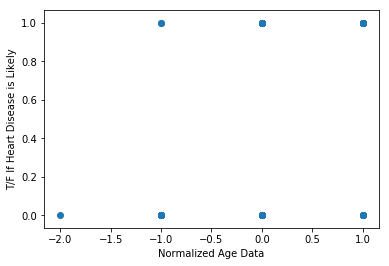

In [53]:
plt.scatter(X_plt[:],Y_plt[:])
plt.xlabel('Normalized Age Data')
plt.ylabel('T/F If Heart Disease is Likely')
plt.show()

In [54]:
# Model
alpha = 0.4
X = tf.placeholder(tf.float32,shape=[None,1]) # Conection for X vals
Y = tf.placeholder(tf.float32,shape=[None,2]) # Connection for Y vals

# Design Matrix

W = tf.Variable(tf.zeros([1,2])) # Two Variables for classification
b = tf.Variable(tf.zeros([2])) # (b1 b2)
#h = tf.matmul(X,W) + b
h = tf.matmul(X,W) + b
# Cost Function Known_Labels = Y, Output_Labels (logits) = h
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=h))

# Optimization
opt_step = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

# Initialization
session = tf.InteractiveSession()
session.run(tf.global_variables_initializer())
x_batch = np.ones((1, 1))
y_batch = np.ones((1, 2))

In [55]:
# Training 
for i in range(500):
    r = np.random.permutation(range(num_tr))
    X_train,Y_train = X_train[r], Y_train[r]
    for j in range(num_tr):
        x_batch[0,:] = X_train[j]
        y_batch[0,:] = Y_train[j]
        session.run(opt_step,feed_dict={X:x_batch,Y:y_batch})

In [60]:
# Verification
for j in range(num_tr):
        x_batch[0,:] = X_train[j]
        y_batch[0,:] = Y_train[j]
        loss = session.run(cost,feed_dict={X:x_batch,Y:y_batch})
w = np.asmatrix(session.run(W))
xx = np.asmatrix([-1])
print("W= ",w)
print("B= ",session.run(b))
print("Total Loss: ",loss)

print("Example Data Point",app_sig(np.matmul(xx,w)))

W=  [[ 1.20243835 -1.20243835]]
B=  [-0.88779169  0.88779169]
Total Loss:  0.862795
Example Data Point [[ 0.23104173  0.76895827]]


In [57]:
# Testing
# Correct prediction between the Y output of the model and the Y_test known values
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_test,1))

# Accuracy Points to Reduce_Mean Operation
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Run Test
accuracy_result = []
for j in range(num_te):
        x_batch[0,:] = X_test[j]
        y_batch[0,:] = Y_test[j]
        accuracy_result.append(accuracy.eval(feed_dict={X:x_batch,Y:y_batch}))

In [58]:
print(np.mean(accuracy_result))

0.734072
